<a href="https://colab.research.google.com/github/Arthicsu/ArthicsuGPT/blob/fashion_mnist-br/accuracy_fashion_mnist_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


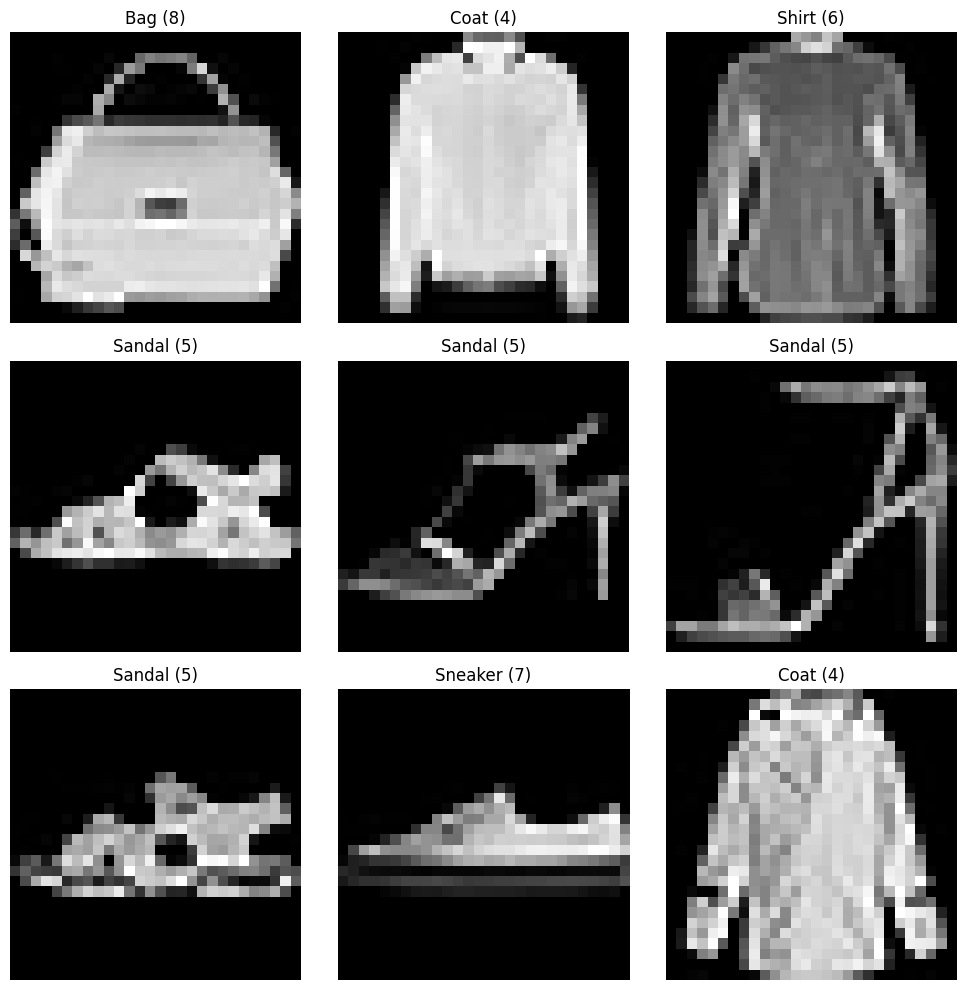

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8952 - loss: 0.3574
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Значение функции потерь (loss) на тестовых данных: 0.3559335172176361
Доля верных ответов на тестовых данных, в процентах (accuracy): 89.61


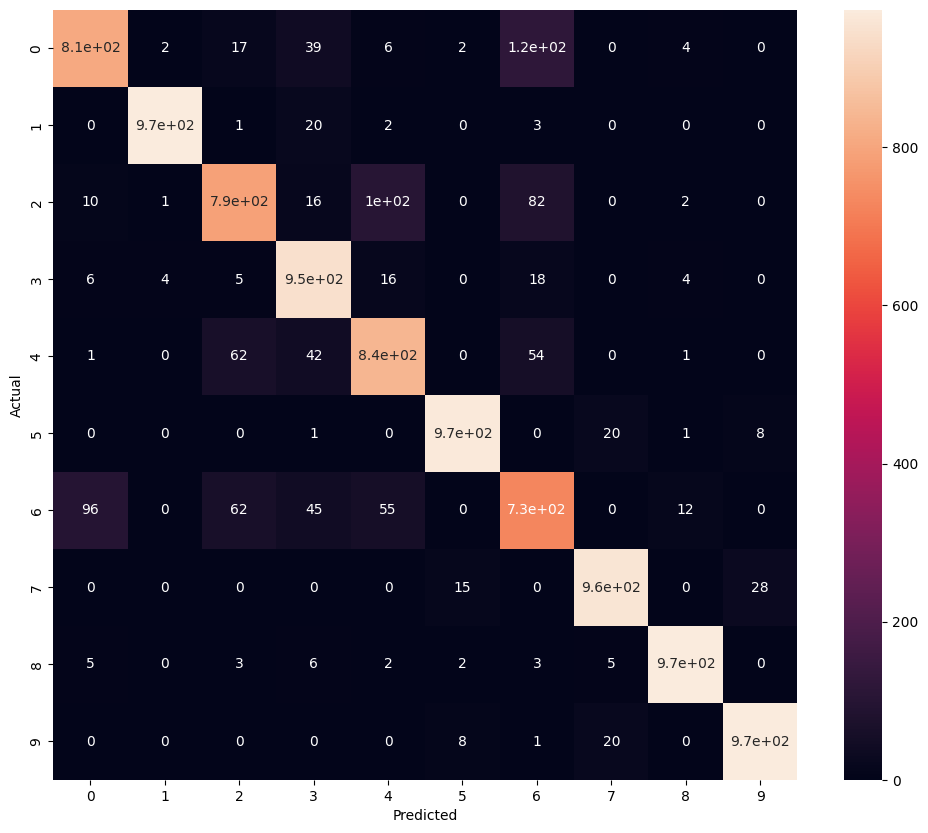

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

from tensorflow.keras.models import load_model
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    idx = random.randint(0, len(x_train)-1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'{class_names[y_train[idx]]} ({y_train[idx]})')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Предобработка данных
# Нормализация и преобразование в float32
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# One-hot encoding для меток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = load_model("/content/fashion_model_v3.keras")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
data = {'y_Actual': y_test_classes,
        'y_Predicted': y_pred_classes}

df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 10))
sn.heatmap(confusion_matrix, annot=True)
print(f'Значение функции потерь (loss) на тестовых данных: {test_loss}')
print(f'Доля верных ответов на тестовых данных, в процентах (accuracy): {round(test_acc * 100, 4)}')
plt.show()